# Gruopwork_Wealth_Consumption

# Research Question

- Does household consume more when their wealth increases? 

- We are interested in the relationship between household wealth and private consumption. We expect to identify a positive relationship between consumption and wealth, using data for EU zone 20 countries, and Japan. Our methodology is OLS regression, and we aim to compute Marginal Propensity to consume(MPC) and elasticity to represent the effect.

# 1 Import Data

## 1.1 EU 

In [17]:
 #Make sure to install ecbdata first
 #Run this line in terminal if not installed:
 #pip install ecbdata

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from ecbdata import ecbdata
import os

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current working directory: {os.getcwd()}")

# Define save directory
save_dir = os.path.join("data", "raw data", "EU")
os.makedirs(save_dir, exist_ok=True)

# Download ECB data
df = ecbdata.get_series('MNA.Q.Y.I9.W0.S1M.S1.D.P31._Z._Z._T.EUR.V.N')
df1 = ecbdata.get_series('DWA.Q.I9.S14.A.LE.NUN.HST.EUR.S.N')

# Save to CSV
df.to_csv(os.path.join(save_dir, "consumption.csv"))
df1.to_csv(os.path.join(save_dir, "housing_wealth.csv"))

print("EU Data downloaded successfully.")

Current working directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
EU Data downloaded successfully.


## 1.2 Japan

### 1.2.1 Resource

- **Consumption**: Household consumption expenditure (from Family Income and Expenditure Survey - 家計調査)
- **Housing Wealth**: Fixed assets (housing component) from National Accounts (SNA)
- **Stock Market Wealth**: Household financial assets (specifically "stocks") from National Accounts (SNA)
- **Income**: Compensation of employees from National Accounts (SNA)

### 1.2.2 Download Data
- Download household consumption data.

In [19]:
import os
import requests

# --- Move to project root ---
# This code ensures you are always at the project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# --- Create directory if it doesn't exist ---
save_dir = "data/raw data/japan"
os.makedirs(save_dir, exist_ok=True)

# --- Define file path ---
save_path = os.path.join(save_dir, "household_consumption.xlsx")

# --- Download URL ---
url = "https://www.esri.cao.go.jp/jp/sna/data/data_list/kakuhou/files/2023/tables/2023ffm1n_jp.xlsx"

# --- Download and Save ---
response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

print(f"Download completed and saved as '{save_path}'.")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Download completed and saved as 'data/raw data/japan/household_consumption.xlsx'.


- Download stock market wealth data.
- Download houseing wealth data.

In [20]:
import os
import requests

# --- Move to project root ---
# This code ensures you are always at the project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# --- Create directory if it doesn't exist ---
save_dir = "data/raw data/japan"
os.makedirs(save_dir, exist_ok=True)

# --- Define file path ---
save_path = os.path.join(save_dir, "household_stock.xlsx")

# --- Download URL ---
url = "https://www.esri.cao.go.jp/jp/sna/data/data_list/kakuhou/files/2023/tables/2023si4_jp.xlsx"

# --- Download and Save ---
response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

print(f"Download completed and saved as '{save_path}'.")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Download completed and saved as 'data/raw data/japan/household_stock.xlsx'.


- Download income data (compensation of employees).

In [21]:
import os
import pandas as pd
import requests

# --- Move to project root ---
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# --- Create directory if it doesn't exist ---
save_dir = "data/raw data/japan"
os.makedirs(save_dir, exist_ok=True)

# --- Define file path ---
save_path = os.path.join(save_dir, "employment_income.xlsx")

# --- Download URL ---
url = "https://www.esri.cao.go.jp/jp/sna/data/data_list/kakuhou/files/2023/tables/2023ffm2_jp.xlsx"

# --- Download and Save ---
response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

# --- Read back the file (optional step) ---
df = pd.read_excel(save_path)

# --- Re-save the file (optional, ensures formatting) ---
df.to_excel(save_path, index=False)

print(f"Employment income data downloaded and saved to '{save_path}'.")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Employment income data downloaded and saved to 'data/raw data/japan/employment_income.xlsx'.


# 2 Manipulate the data

## 2.1 EU

In [25]:
#Manipulate to what we want
data = df[['TIME_PERIOD','OBS_VALUE','UNIT_MEASURE']].dropna()
data.head(2)
data = data.rename({'TIME_PERIOD' : 'date','OBS_VALUE':'consumption'},axis=1)
data.date = pd.PeriodIndex(data.date, freq='Q').to_timestamp()
data = data[(data['date'] >= '2009-01-01') & (data['date']<= '2024-07-01')]


data1= df1[['TIME_PERIOD','OBS_VALUE','UNIT_MEASURE']].dropna()
data1 = data1.rename({'TIME_PERIOD' : 'date','OBS_VALUE':'housing wealth'},axis=1)
data1.date = pd.PeriodIndex(data1.date, freq='Q').to_timestamp()
data1 = data1[(data1['date'] >= '2009-01-01') & (data1['date']<= '2024-07-01')]

## 2.2 Japan

- Manipulate household consumption data.

In [ ]:
import os
import sys
import pandas as pd

# --- Move to project root safely ---
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Working directory set to: {os.getcwd()}")

# --- Add 'src' to sys.path ---
sys.path.append("src")
from data_function.extract_household_consumption import extract_household_consumption

# --- Define paths ---
save_path = "data/raw data/japan/household_consumption.xlsx"
processed_dir = "data/processing_data/japan/"
processed_path = os.path.join(processed_dir, "processed_household_consumption.csv")

# --- Create directory if not exists ---
os.makedirs(os.path.dirname(save_path), exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# --- Extract and save ---
consumption_data = extract_household_consumption(save_path)
consumption_data.to_csv(processed_path, index=False)

print(f"Processed data saved to: {processed_path}")


Working directory set to: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Processed data saved to: data/processing_data/japan/processed_household_consumption.csv


- Manipulate
  - stock market wealth data.
  - houseing wealth data.

In [ ]:
import os
import sys
import pandas as pd

# --- Move to project root safely ---
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Working directory set to: {os.getcwd()}")

# --- Add 'src' to sys.path ---
sys.path.append("src")
from data_function.extract_housing_and_stock import extract_housing_and_stock

# --- Define paths ---
file_path = "data/raw data/japan/household_stock.xlsx"
processed_dir = "data/processing_data/japan/"
processed_path = os.path.join(processed_dir, "processed_household_stock.csv")

# --- Create directories if not exist ---
os.makedirs(os.path.dirname(file_path), exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# --- Extract and save ---
processed_data = extract_housing_and_stock(file_path)
processed_data.to_csv(processed_path, index=False)

print(f"Processed data saved to: {processed_path}")


Working directory set to: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Processed data saved to: data/processing_data/japan/processed_household_stock.csv


- Manipulate income data (compensation of employees).

In [ ]:
import os
import sys
import pandas as pd

# --- Move to project root safely ---
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Working directory set to: {os.getcwd()}")

# --- Add 'src' to sys.path ---
sys.path.append("src")
from data_function.extract_employment_income import extract_employment_income

# --- Define paths ---
file_path = "data/raw data/japan/employment_income.xlsx"
processed_dir = "data/processing_data/japan/"
processed_path = os.path.join(processed_dir, "processed_employment_income.csv")

# --- Create directories if not exist ---
os.makedirs(os.path.dirname(file_path), exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# --- Extract and save ---
processed_employment_income = extract_employment_income(file_path)
processed_employment_income.to_csv(processed_path, index=False)

print(f"Processed employment income data saved to: {processed_path}")


Working directory set to: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Processed employment income data saved to: data/processing_data/japan/processed_employment_income.csv


# 3 Merge the data and present it in figure

## 3.1 EU

In [26]:
# Merge datasets on 'date' and 'UNIT_MEASURE'
df_merge = pd.merge(
    data, data1,
    how='inner',
    on=['date', 'UNIT_MEASURE']
)

# Preview
df_merge.head(10)


,date,consumption,UNIT_MEASURE,housing wealth
0,2009-01-01,1.315107e+06,EUR,938317.2543
1,2009-04-01,1.315919e+06,EUR,933975.7482
2,2009-07-01,1.318336e+06,EUR,942684.9957
3,2009-10-01,1.326403e+06,EUR,948920.3216
4,2010-01-01,1.334665e+06,EUR,949624.0082
5,2010-04-01,1.345625e+06,EUR,962677.6254
6,2010-07-01,1.354802e+06,EUR,972998.8387
7,2010-10-01,1.367906e+06,EUR,980989.9490
8,2011-01-01,1.376731e+06,EUR,981507.5475
9,2011-04-01,1.382207e+06,EUR,984370.6577


## 3.2 Japan

In [27]:
import os
import pandas as pd

# --- Move to project root safely ---
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# --- Define file paths ---
raw_path = "data/processing_data/japan/"
clean_path = "data/clean/japan"

csv_files = {
    "household_consumption": os.path.join(raw_path, "processed_household_consumption.csv"),
    "housing_stock_wealth": os.path.join(raw_path, "processed_household_stock.csv"),
    "employee_income": os.path.join(raw_path, "processed_employment_income.csv"),
}

# --- Read each dataset ---
consumption = pd.read_csv(csv_files["household_consumption"])
housing_stock = pd.read_csv(csv_files["housing_stock_wealth"])
employee_income = pd.read_csv(csv_files["employee_income"])

# --- Merge on 'year' ---
merged_data = consumption.merge(
    housing_stock, on="year", how="inner"
).merge(
    employee_income, on="year", how="inner"
)

# --- Check merged dataset ---
print(merged_data.head())
print(merged_data.columns)

# --- Round value columns ---
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
merged_data[value_columns] = merged_data[value_columns].round(0).astype(int)

# --- Create clean directory if not exists ---
os.makedirs(clean_path, exist_ok=True)

# --- Save merged data ---
merged_path = os.path.join(clean_path, "merged_macro_data.csv")
merged_data.to_csv(merged_path, index=False)

print(f"Merged dataset saved successfully at {merged_path}!")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
   year  household_consumption  fixed_asset  stock_asset  employment_income
0  1994               266250.9     397066.4     130971.4           262822.6
1  1995               271381.7     399831.5     128776.7           267095.2
2  1996               278702.4     416861.5     118755.9           272962.4
3  1997               279745.5     423410.6      86465.8           279054.2
4  1998               278920.2     418589.8      80110.8           273370.2
Index(['year', 'household_consumption', 'fixed_asset', 'stock_asset',
       'employment_income'],
      dtype='object')
Merged dataset saved successfully at data/clean/japan/merged_macro_data.csv!


# 4 Descriptive Statistics

## 4.1 EU

In [28]:
# Show full descriptive statistics
print("Descriptive Statistics:")
print(df_merge[['consumption', 'housing wealth']].describe())


Descriptive Statistics:
        consumption  housing wealth
count  6.300000e+01    6.300000e+01
mean   1.543252e+06    1.055177e+06
std    1.943559e+05    1.274836e+05
min    1.315107e+06    9.115009e+05
25%    1.392759e+06    9.492722e+05
50%    1.489341e+06    1.009117e+06
75%    1.614464e+06    1.128342e+06
max    2.008268e+06    1.322628e+06


## 4.2 Japan

### 4.2.1 Indicator 

In [42]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import os

# Move to project root safely
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Load merged data
merged_path = "data/clean/japan/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)
# Show descriptive statistics
print("Descriptive Statistics (Original Data):")
# print(merged_data.describe())

# Convert values to billion yen (divide by 1000)
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
merged_data[value_columns] = merged_data[value_columns] / 1000

# Show descriptive statistics again after conversion
print("\nDescriptive Statistics (Converted to Billion Yen):")
print(merged_data.describe())


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Descriptive Statistics (Original Data):

Descriptive Statistics (Converted to Billion Yen):
              year  household_consumption  fixed_asset  stock_asset  \
count    30.000000              30.000000    30.000000    30.000000   
mean   2008.500000             286.519100   410.729967   143.437700   
std       8.803408               9.773603    13.696322    48.360759   
min    1994.000000             266.251000   385.535000    80.111000   
25%    2001.250000             280.426750   401.289750   102.274250   
50%    2008.500000             283.809500   409.338000   134.562500   
75%    2015.750000             291.108250   418.097250   178.615500   
max    2023.000000             314.756000   443.824000   250.212000   

       employment_income  
count          30.000000  
mean          268.422100  
std            13.729709  
min           251.155000  
25%           257.151000  
50%           266.433500  


### 4.2.2 Growth Rate

In [30]:
# Load merged data
merged_path = "data/clean/japan/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)

# Convert values to billion yen
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
merged_data[value_columns] = merged_data[value_columns] / 1000

# Calculate growth rates (%)
growth_data = merged_data.copy()
for col in value_columns:
    growth_data[col + "_growth"] = growth_data[col].pct_change() * 100

# Drop the first row with NaNs due to pct_change
growth_data = growth_data.dropna().reset_index(drop=True)

# Show descriptive statistics of growth rates
growth_columns = [col + "_growth" for col in value_columns]
print("Descriptive Statistics of Growth Rates (%):")
print(growth_data[growth_columns].describe().round(2))


Descriptive Statistics of Growth Rates (%):
       household_consumption_growth  fixed_asset_growth  stock_asset_growth  \
count                         29.00               29.00               29.00   
mean                           0.60                0.38                5.18   
std                            1.96                2.20               26.14   
min                           -5.29               -4.69              -39.15   
25%                           -0.24               -0.97               -9.10   
50%                            0.56                0.31               -0.45   
75%                            1.07                1.57               15.59   
max                            6.08                7.61               72.45   

       employment_income_growth  
count                     29.00  
mean                       0.50  
std                        1.95  
min                       -4.84  
25%                       -0.66  
50%                        1.11  
75%   

# 5 Visualization

## 5.1 EU

### 5.1.1 Time Series Plot

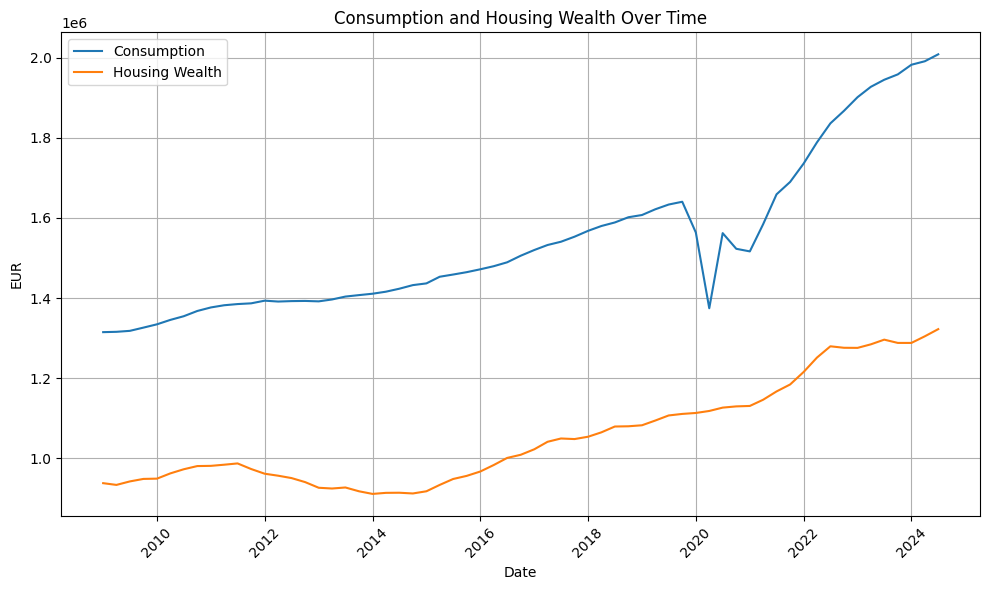

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_merge['date'], df_merge['consumption'], label='Consumption')
plt.plot(df_merge['date'], df_merge['housing wealth'], label='Housing Wealth')
plt.xlabel('Date')
plt.ylabel('EUR')
plt.title('Consumption and Housing Wealth Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This line chart compares the trends of household consumption and housing wealth in the EU over time (2008–2024).
- Explanation:
  - Consumption (blue line) shows a steady increase, with a noticeable drop in **2020** likely due to the COVID-19 pandemic, followed by a sharp recovery.
  - Housing Wealth (orange line) exhibits a more gradual upward trend with less volatility.
  - The overall pattern suggests a positive relationship: as housing wealth increases, consumption also tends to grow

### 5.1.2 Bar Chart

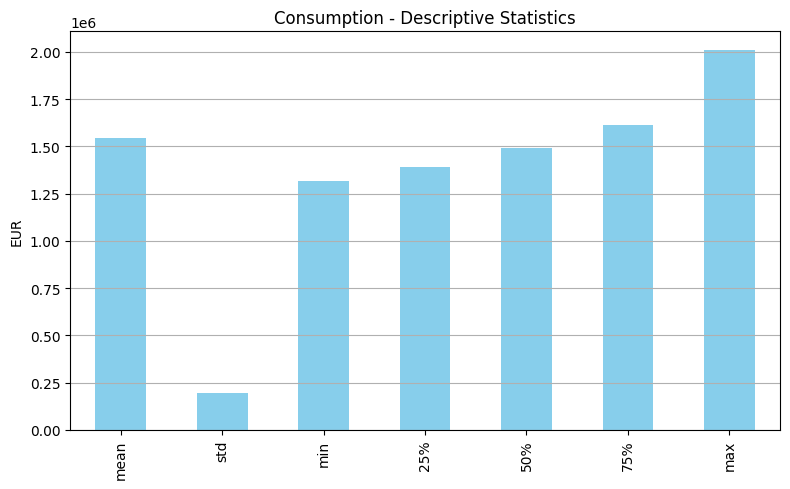

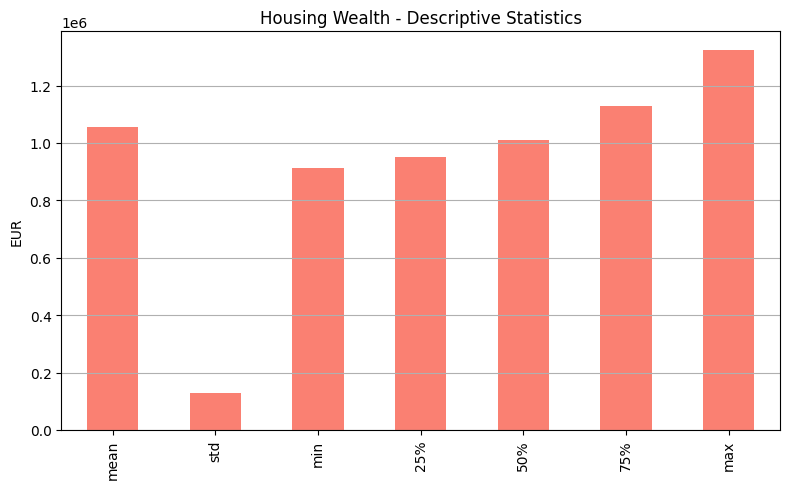

In [ ]:
import matplotlib.pyplot as plt

# Consumption statistics
plt.figure(figsize=(8, 5))
plt.title('Consumption - Descriptive Statistics')
df_merge['consumption'].describe().drop(['count']).plot(kind='bar', color='skyblue')
plt.ylabel('EUR')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Housing wealth statistics
plt.figure(figsize=(8, 5))
plt.title('Housing Wealth - Descriptive Statistics')
df_merge['housing wealth'].describe().drop(['count']).plot(kind='bar', color='salmon')
plt.ylabel('EUR')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- Consumption - Descriptive Statistics
  - This bar chart summarizes the descriptive statistics for household consumption in the EU dataset.
  - The mean consumption is around 1.55 million EUR, The min and max values span a range from about 1.3 million to just over 2 million EUR.

- Housing Wealth - Descriptive Statistics
  - The mean value is slightly above 1 million EUR, The range is narrower, from around 0.9 million to 1.3 million EUR.

## 5.2 Japan

### 5.2.1 Indicator Plot

#### 5.2.1.1 Line Plot

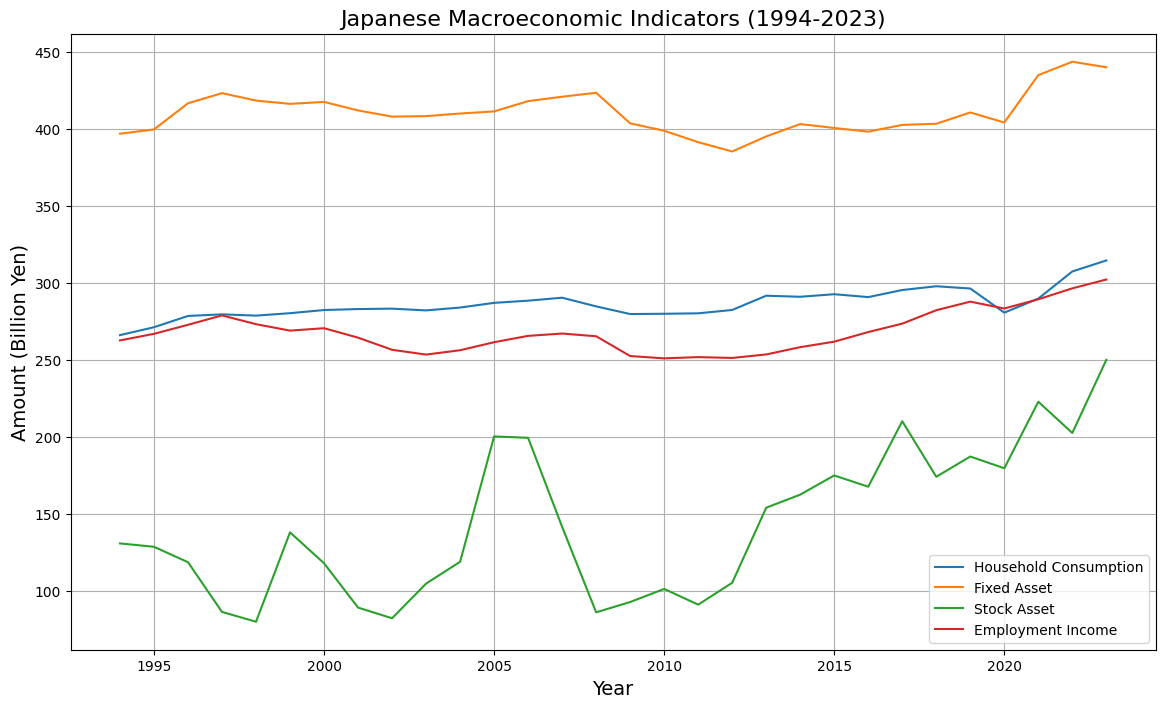

In [ ]:
# Plotting
plt.figure(figsize=(14, 8))

# Plot each variable
for column in value_columns:
    plt.plot(merged_data['year'], merged_data[column], label=column.replace('_', ' ').title())

# Title and labels
plt.title("Japanese Macroeconomic Indicators (1994-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Amount (Billion Yen)", fontsize=14)
plt.legend()
plt.grid(True)

# Save the figure if needed
# plt.savefig("macro_data_trends.png", dpi=300)

plt.show()


- Japanese Macroeconomic Indicators (1994–2023) — Explanation
  - Fixed Asset (orange): Remains the highest among the four indicators, showing a relatively stable trend with slight fluctuations.
  - Household Consumption (blue): Gradually increases over the 30-year span, with minor dips around economic slowdowns.
  - Employment Income (red): Mostly stable, with a gentle upward trend after 2012, reflecting modest wage growth.
  - Stock Asset (green): Highly volatile, reflecting the sensitivity of financial markets. Sharp spikes and drops indicate market instability during specific periods (e.g., early 2000s, post-2008).

Overall, the chart shows steady growth in real economy indicators (consumption and income), while financial wealth (stock assets) exhibits more volatility, indicating different dynamics in asset accumulation and income.


#### 5.2.1.2 Normality

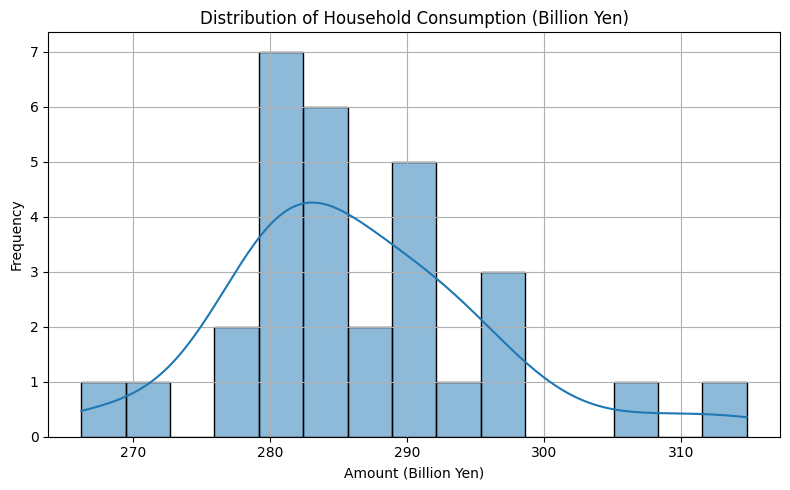

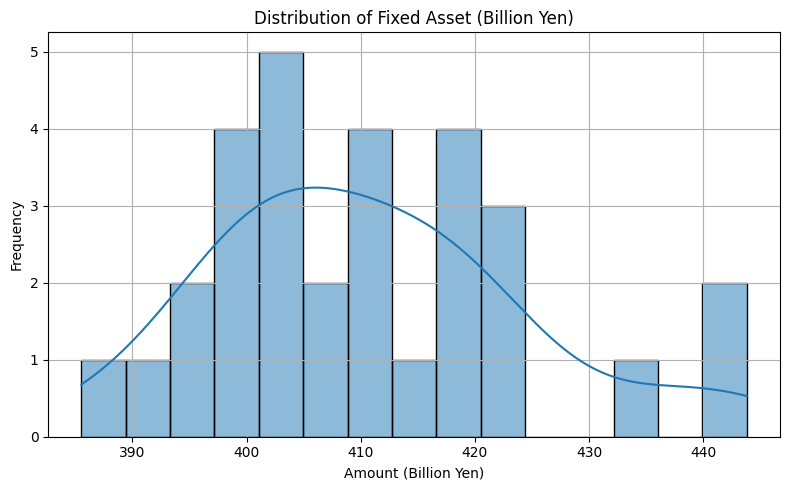

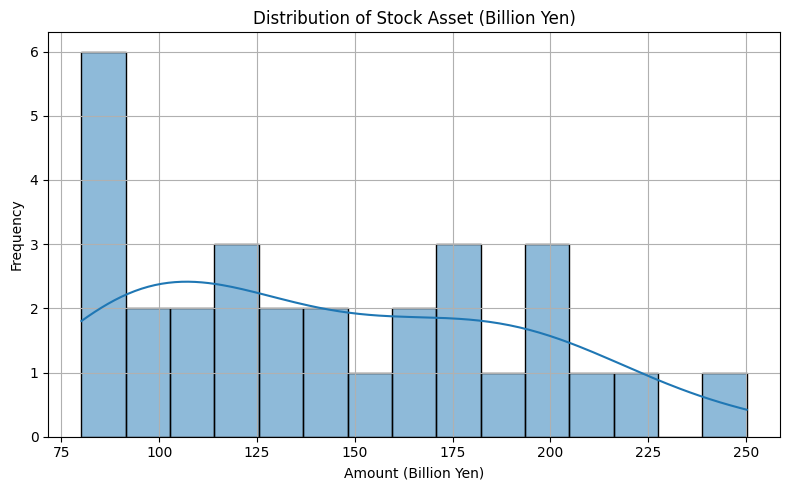

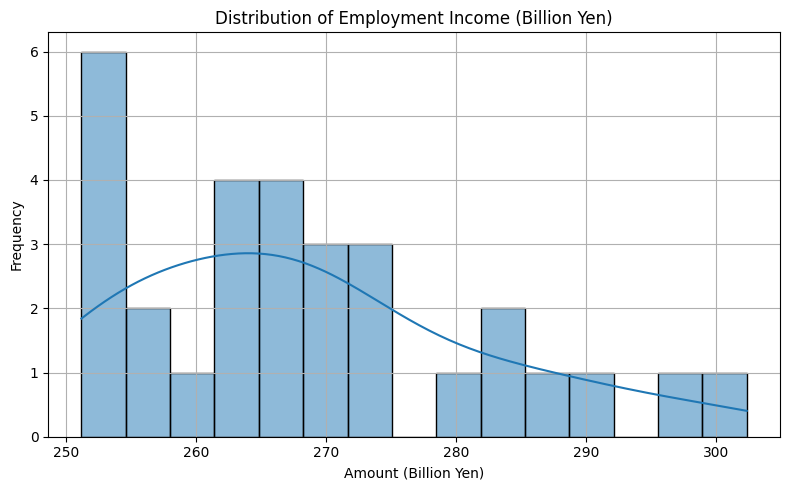

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each growth variable
for col in value_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged_data[col], bins=15, kde=True)
    plt.title(f"Distribution of {col.replace('_', ' ').title()} (Billion Yen)")
    plt.xlabel("Amount (Billion Yen)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

1️⃣ Household Consumption
- The distribution is slightly right-skewed, with most values centered around 280–290 billion yen. This suggests a generally stable level of household consumption with a few years of stronger spending.

2️⃣ Fixed Asset
- The values are more symmetrically distributed, centered around 400–420 billion yen. This indicates that fixed assets (mainly housing wealth) remained relatively steady over time, with moderate variation.

3️⃣ Stock Asset
- This distribution is left-skewed, with a concentration of values below 150 billion yen, and a long tail toward higher values. This reflects occasional spikes in financial asset holdings, but most years show modest stock wealth.

4️⃣ Employment Income
- The distribution is right-skewed, peaking around 255–270 billion yen. It implies that labor income is relatively consistent across years, with a few outlier years of higher income likely due to economic upturns or wage policy changes.



### 5.2.2 Change of Indicator Plot

#### 5.2.2.1 Growth Rate

- Histograms of Growth Rates

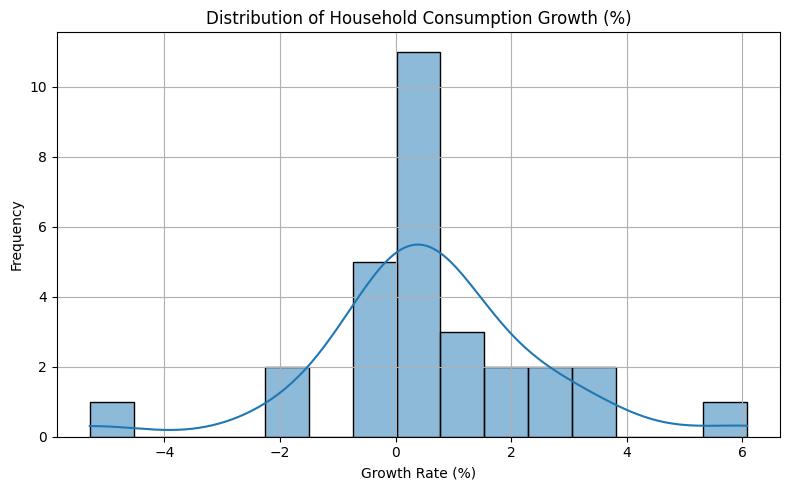

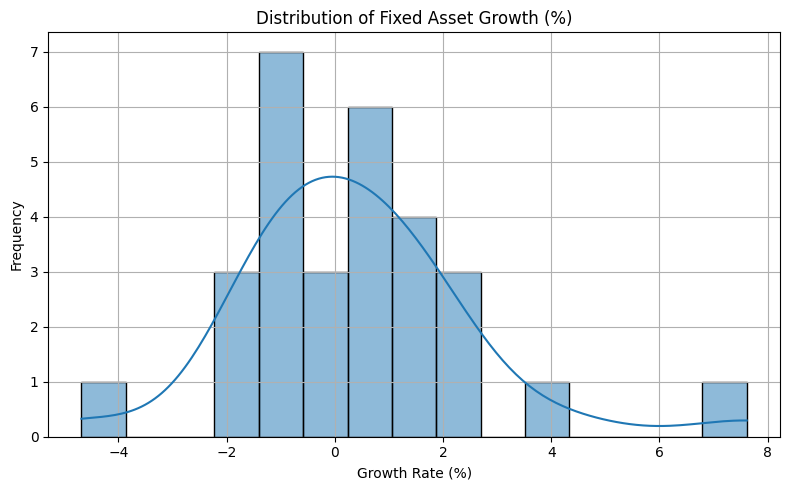

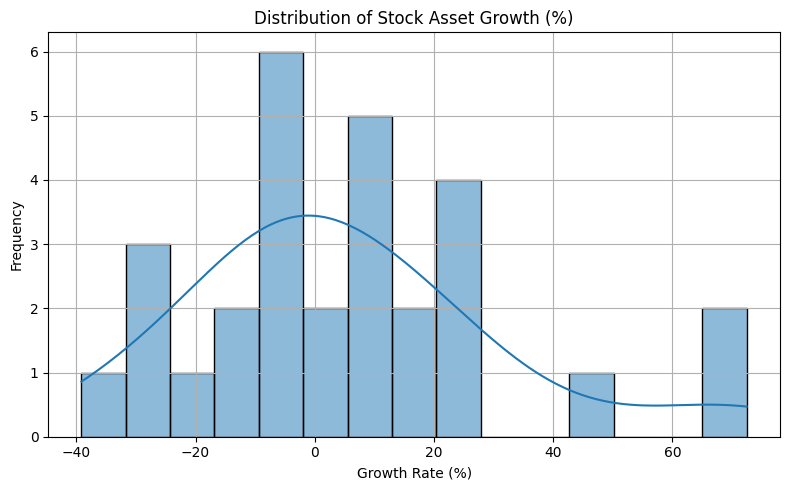

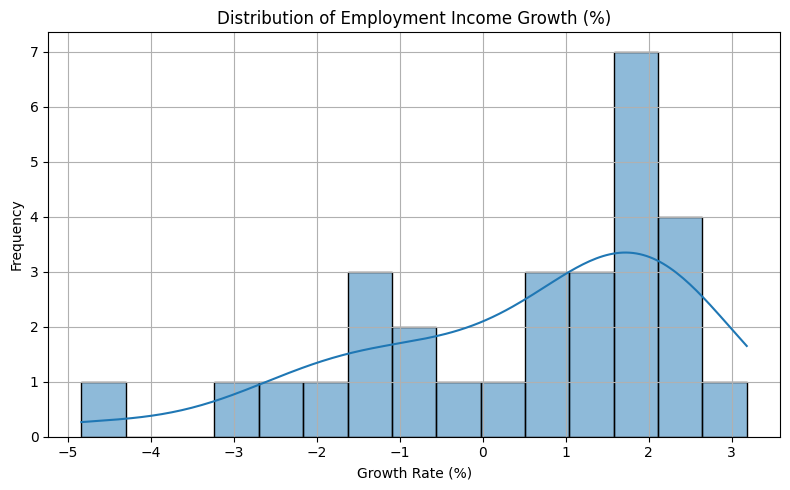

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each growth variable
for col in growth_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(growth_data[col], bins=15, kde=True)
    plt.title(f"Distribution of {col.replace('_', ' ').title()} (%)")
    plt.xlabel("Growth Rate (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


1️⃣ Distribution of Household Consumption Growth (%)
- This distribution is centered around 0%, indicating low but stable growth in household consumption.
Most values fall between -2% and 2%, with a few outliers on both sides. The bell shape suggests near-normality with slight skew.

2️⃣ Distribution of Fixed Asset Growth (%)
- The fixed asset growth distribution is also centered near zero, but with a wider spread than consumption.
It shows a slightly positive skew, indicating more frequent small declines and occasional strong positive growth years.

3️⃣ Distribution of Stock Asset Growth (%)
- This distribution is highly spread out and skewed, reflecting the high volatility of stock markets.
Growth rates range from -40% to over +60%, with frequent large fluctuations, indicating risk and opportunity in financial assets.

4️⃣ Distribution of Employment Income Growth (%)
- This distribution is right-skewed, with most growth rates clustered between 0% and 2%.
It shows that income tends to grow slowly and steadily, with fewer instances of negative growth or large increases.

- Shapiro-Wilk Normality Test

In [ ]:
from scipy.stats import shapiro

# Lists to hold variable
normal_vars = []
non_normal_vars = []

# Loop through each growth rate variable
print("Shapiro-Wilk Normality Test Results:\n")
for col in growth_columns:
    stat, p = shapiro(growth_data[col].dropna())
    result = f"{col}: W = {stat:.4f}, p-value = {p:.4f}"
    
    if p >= 0.05:
        normal_vars.append(result)
    else:
        non_normal_vars.append(result)

# Print variables that pass or not pass the normality test
print("Passed (Approximately Normal):")
for r in normal_vars:
    print("  ", r)

print("\nNot Normal (Rejected Normality):")
for r in non_normal_vars:
    print("  ", r)

Shapiro-Wilk Normality Test Results:

Passed (Approximately Normal):
   stock_asset_growth: W = 0.9340, p-value = 0.0700

Not Normal (Rejected Normality):
   household_consumption_growth: W = 0.9083, p-value = 0.0156
   fixed_asset_growth: W = 0.9117, p-value = 0.0189
   employment_income_growth: W = 0.9049, p-value = 0.0128


#### 5.2.2.2 Growth Rate of Log-Differenced

In [37]:
import numpy as np

# Copy data
logdiff_data = merged_data.copy()

# Apply log transformation and first difference
for col in value_columns:
    log_col = f"log_{col}"
    logdiff_col = f"logdiff_{col}"

    logdiff_data[log_col] = np.log(logdiff_data[col])
    logdiff_data[logdiff_col] = logdiff_data[log_col].diff() * 100  # as % change

# Drop NaN from first difference
logdiff_data = logdiff_data.dropna().reset_index(drop=True)

# Select only the log-differenced columns for display
logdiff_columns = [f"logdiff_{col}" for col in value_columns]
print("Descriptive Statistics of Log-Differenced (% Growth Approximation):")
print(logdiff_data[logdiff_columns].describe().round(3))


Descriptive Statistics of Log-Differenced (% Growth Approximation):
       logdiff_household_consumption  logdiff_fixed_asset  \
count                         29.000               29.000   
mean                           0.577                0.356   
std                            1.952                2.169   
min                           -5.434               -4.798   
25%                           -0.235               -0.979   
50%                            0.563                0.305   
75%                            1.066                1.559   
max                            5.903                7.338   

       logdiff_stock_asset  logdiff_employment_income  
count               29.000                     29.000  
mean                 2.232                      0.483  
std                 23.969                      1.960  
min                -49.680                     -4.961  
25%                 -9.536                     -0.659  
50%                 -0.454                    

- Histograms of Log-Differenced Growth Rates

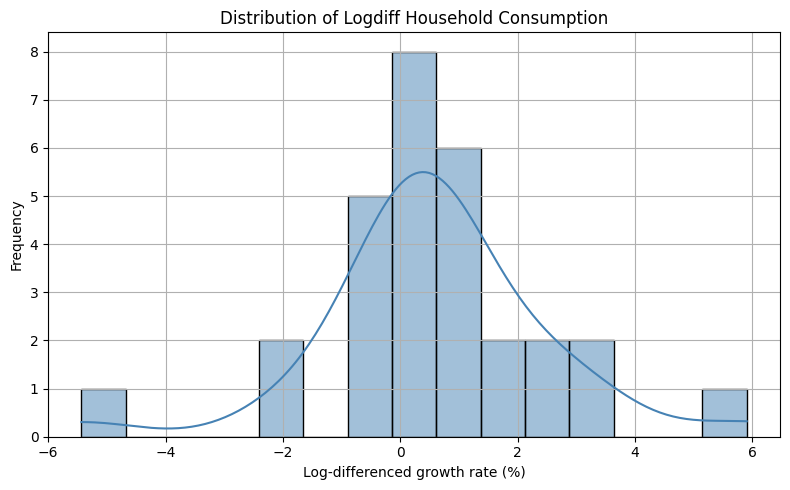

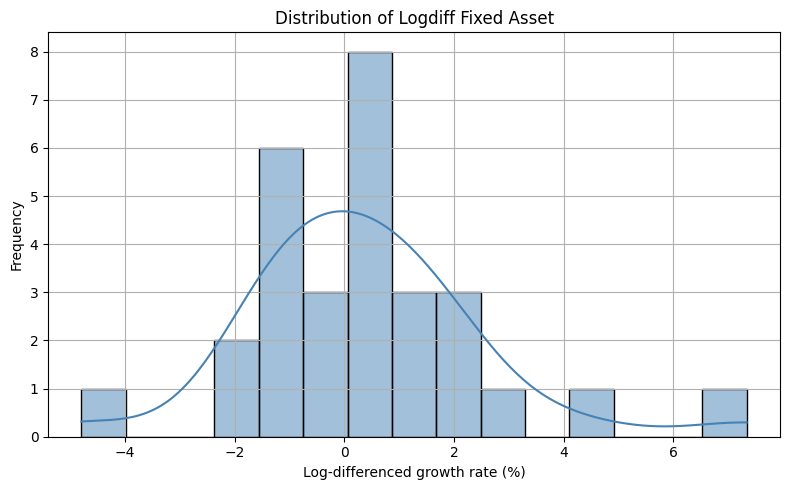

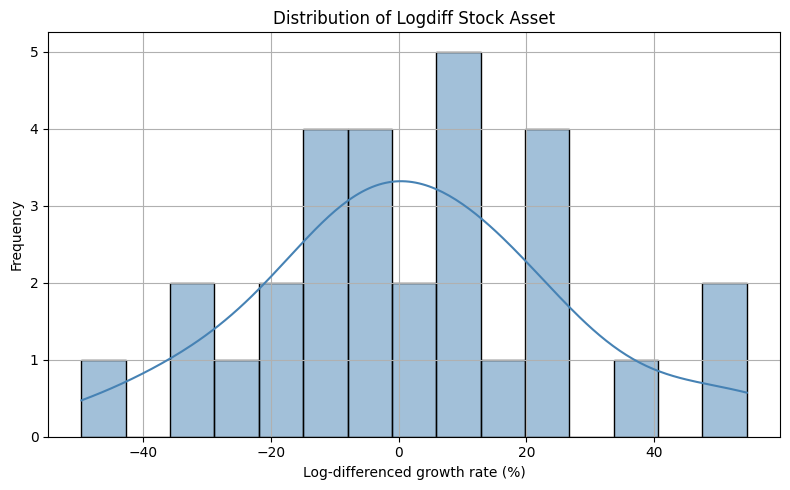

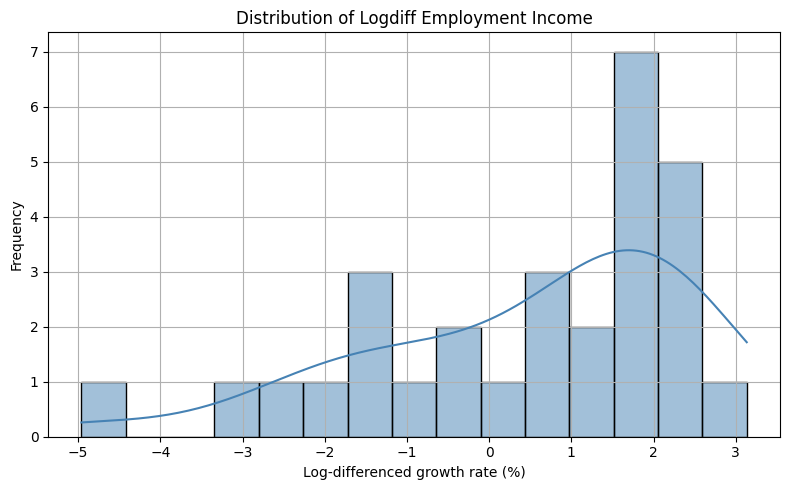

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms with KDE for each log-differenced variable
for col in logdiff_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(logdiff_data[col], bins=15, kde=True, color='steelblue')
    plt.title(f"Distribution of {col.replace('_', ' ').title()}")
    plt.xlabel("Log-differenced growth rate (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


1️⃣ Household Consumption
- The distribution is tightly clustered around 0%, showing that consumption changes only slightly each year. The slight right skew suggests occasional years of stronger positive growth, but overall variability is low.

2️⃣ Fixed Asset
- Also centered around zero, with a similar spread to consumption. Most changes are within ±2%, indicating that housing-related wealth changes are gradual and stable over time.

3️⃣ Stock Asset
- This distribution is wider and flatter, reflecting the high volatility of financial assets. While the mean is near 0%, individual years can see large positive or negative swings (from -40% to +50%).

4️⃣ Employment Income
- Like consumption, income growth is concentrated near 0–2%, with a modest right skew. This suggests stable, incremental increases in labor income, consistent with macroeconomic trends in wages.

- Shapiro-Wilk Normality Test

In [ ]:
from scipy.stats import shapiro

# Initialize groups
normal_vars = []       # Passed normality test (p >= 0.05)
non_normal_vars = []   # Failed normality test (p < 0.05)

print("Shapiro-Wilk Normality Test for Log-Differenced Growth Rates:\n")

# Run the test for each log-differenced variable
for col in logdiff_columns:
    stat, p = shapiro(logdiff_data[col].dropna())
    result = f"{col}: W = {stat:.4f}, p-value = {p:.4f}"

    if p >= 0.05:
        normal_vars.append(result)
    else:
        non_normal_vars.append(result)

# Output grouped results
print("Passed (Approximately Normal):")
for r in normal_vars:
    print("  ", r)

print("\nFailed (Not Normal):")
for r in non_normal_vars:
    print("  ", r)


Shapiro-Wilk Normality Test for Log-Differenced Growth Rates:

Passed (Approximately Normal):
   logdiff_stock_asset: W = 0.9795, p-value = 0.8244

Failed (Not Normal):
   logdiff_household_consumption: W = 0.9064, p-value = 0.0140
   logdiff_fixed_asset: W = 0.9192, p-value = 0.0291
   logdiff_employment_income: W = 0.9009, p-value = 0.0103


## 5.3 Overall 

### 5.3.1 Radar Chart

#### 5.3.1.1 Normal Version

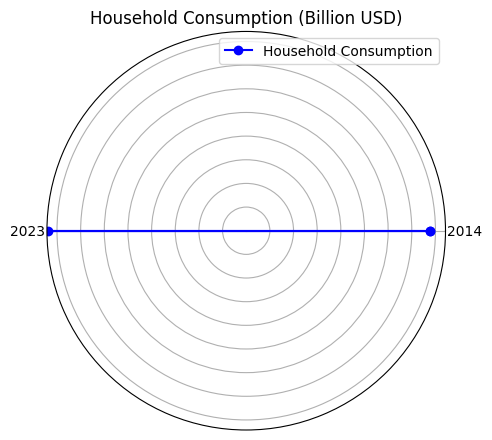

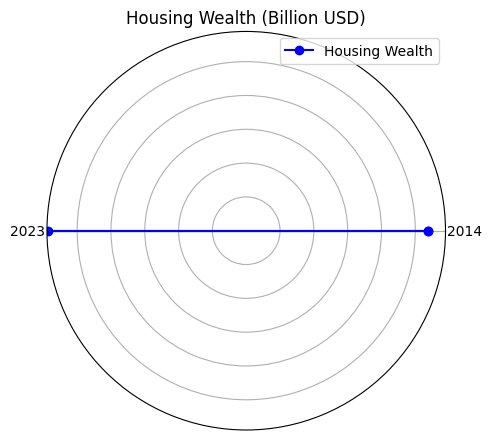

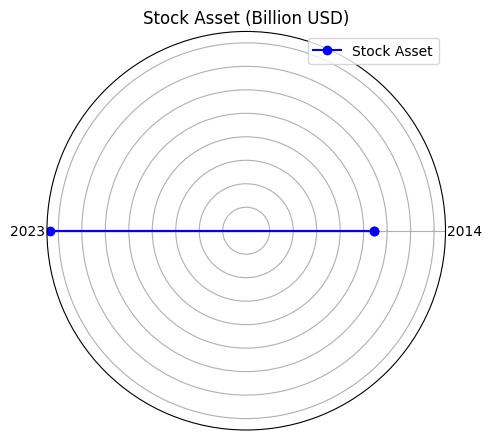

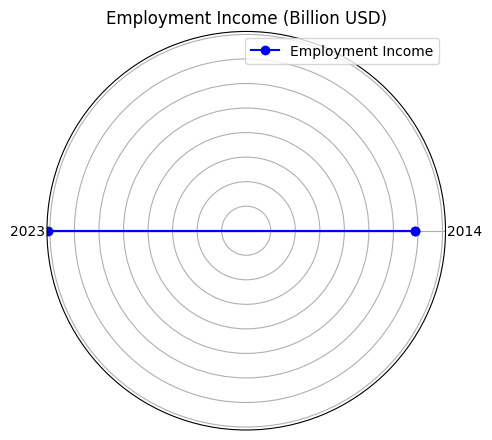

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare data
merged_path = "data/clean/japan/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)

# Convert values to billion yen → then to billion USD
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
yen_to_usd = 150
merged_data[value_columns] = merged_data[value_columns] / 1000  # billion yen
merged_data[value_columns] = merged_data[value_columns] / yen_to_usd  # billion USD

# Extract only 2014 and 2023
selected_years = [2014, 2023]
df_selected = merged_data[merged_data['year'].isin(selected_years)].copy()
df_plot = df_selected.set_index('year')[value_columns].T
df_plot.columns = ['2014', '2023']
df_plot.index = ['Household Consumption', 'Housing Wealth', 'Stock Asset', 'Employment Income']

# Create individual radar charts for each indicator
angles = np.linspace(0, 2 * np.pi, 2, endpoint=False).tolist()
angles += angles[:1]

for i, indicator in enumerate(df_plot.index):
    values = df_plot.loc[indicator].tolist()
    values += values[:1]  # make circular
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color='blue', marker='o', label=indicator)
    ax.fill(angles, values, alpha=0.25, color='blue')
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['2014', '2023'])
    ax.set_title(f"{indicator} (Billion USD)", fontsize=12)
    ax.set_yticklabels([])
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


#### 5.3.1.2 Growth Rate

### 5.3.2 Dashboard

# 6 Regression

## 6.1 EU

## 6.2 Japan

### 6.2.1 Modeling of Long-run 

Empirical Strategy

- Conduct a regression based on the following model:

$$
\log C_{t} = \alpha + \beta \log S_{t} + \gamma \log H_{t} + \phi \log Y_{t} + \epsilon_{t}
$$

- Where:

\begin{array}{ll}
C_{t} & : \text{Household consumption} \\
S_{t} & : \text{Stock market wealth} \\
H_{t} & : \text{Housing wealth} \\
Y_{t} & : \text{Compensation of employees}
\end{array}


Main Focus

- Estimate and compare:

\begin{array}{ll}
\gamma & : \text{Elasticity of consumption with respect to housing wealth} \\
\beta & : \text{Elasticity of consumption with respect to stock market wealth}
\end{array}



 - Make values become log-transformed variables.

In [36]:
import numpy as np 

# Create log-transformed variables
merged_data["log_household_consumption"] = np.log(merged_data["household_consumption"])
merged_data["log_fixed_asset"] = np.log(merged_data["fixed_asset"])
merged_data["log_stock_asset"] = np.log(merged_data["stock_asset"])
merged_data["log_employment_income"] = np.log(merged_data["employment_income"])

# Check
print(merged_data[["log_household_consumption", "log_fixed_asset", "log_stock_asset", "log_employment_income"]].head())


   log_household_consumption  log_fixed_asset  log_stock_asset  \
0                   5.584439         5.984103         4.874976   
1                   5.603527         5.991044         4.858082   
2                   5.630143         6.032755         4.777071   
3                   5.633882         6.048343         4.459751   
4                   5.630925         6.036892         4.383413   

   log_employment_income  
0               5.571481  
1               5.587604  
2               5.609333  
3               5.631405  
4               5.610826  


### 6.2.1.1 OLS

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Prepare independent variables
X = merged_data[["log_fixed_asset", "log_stock_asset", "log_employment_income"]]
X = sm.add_constant(X)  # constant term

# Prepare dependent variable
y = merged_data["log_household_consumption"]

# Run OLS regression
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())


                                OLS Regression Results                               
Dep. Variable:     log_household_consumption   R-squared:                       0.524
Model:                                   OLS   Adj. R-squared:                  0.469
Method:                        Least Squares   F-statistic:                     9.536
Date:                       Tue, 13 May 2025   Prob (F-statistic):           0.000202
Time:                               19:29:24   Log-Likelihood:                 70.763
No. Observations:                         30   AIC:                            -133.5
Df Residuals:                             26   BIC:                            -127.9
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

### → Findings from the Results

### Coefficient Interpretations

- **`log_stock_asset` (Stock Market Wealth)**
  - **Coefficient (β) = 0.0560**, **p-value = 0.003** → **Statistically significant at the 1% level**.
  - → **An increase in stock market wealth is strongly associated with higher household consumption**.

- **`log_fixed_asset` (presumably Housing Wealth)**
  - **Coefficient (γ) = 0.2938**, **p-value = 0.163** → **Not statistically significant (even at the 10% level)**.
  - → **The relationship between housing wealth and consumption appears weak and statistically insignificant**.

- **`log_employment_income` (Compensation of Employees)**
  - **Coefficient = 0.0207**, **p-value = 0.897** → **Highly insignificant**.
  - → **No detectable effect of employment income on consumption in this model**.

### Model Fit

- **R-squared = 0.524** → **Moderate explanatory power** (the model explains about 52% of the variation in household consumption).

### Cautions

- The **Condition Number is large (1850)**, which suggests **potential multicollinearity**.

---

### Summary (in brief)
- **Stock market wealth has a small but statistically significant positive effect on consumption.**
- **Housing wealth shows a larger coefficient but is not statistically significant.**
- **Employment income appears irrelevant for consumption dynamics in this model.**
- **Maybe multicollinearity issues occurs.**


#### 6.2.1.2 Robust OLS

In [34]:
import statsmodels.api as sm

# Add constant term
X = sm.add_constant(X)

# Fit OLS with robust standard errors (HC3 type)
robust_ols_model = sm.OLS(y, X).fit(cov_type='HC3')

# Show summary
print(robust_ols_model.summary())

                                OLS Regression Results                               
Dep. Variable:     log_household_consumption   R-squared:                       0.524
Model:                                   OLS   Adj. R-squared:                  0.469
Method:                        Least Squares   F-statistic:                     7.351
Date:                       Tue, 13 May 2025   Prob (F-statistic):            0.00101
Time:                               19:29:29   Log-Likelihood:                 70.763
No. Observations:                         30   AIC:                            -133.5
Df Residuals:                             26   BIC:                            -127.9
Df Model:                                  3                                         
Covariance Type:                         HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

#### 6.2.1.3 GLS (Generalized Least Squares)

In [ ]:
# Fit Generalized Least Squares (assumes known structure of heteroscedasticity or correlation)
gls_model = sm.GLS(y, X).fit()

# Show summary
print(gls_model.summary())

                                GLS Regression Results                               
Dep. Variable:     log_household_consumption   R-squared:                       0.524
Model:                                   GLS   Adj. R-squared:                  0.469
Method:                        Least Squares   F-statistic:                     9.536
Date:                       Mon, 12 May 2025   Prob (F-statistic):           0.000202
Time:                               11:09:45   Log-Likelihood:                 70.763
No. Observations:                         30   AIC:                            -133.5
Df Residuals:                             26   BIC:                            -127.9
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

#### 6.2.1.4 GLM (Generalized Linear Model)

In [ ]:
# Fit Generalized Linear Model with Gaussian family (similar to OLS)
glm_model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Show summary
print(glm_model.summary())


                     Generalized Linear Model Regression Results                     
Dep. Variable:     log_household_consumption   No. Observations:                   30
Model:                                   GLM   Df Residuals:                       26
Model Family:                       Gaussian   Df Model:                            3
Link Function:                      Identity   Scale:                      0.00060377
Method:                                 IRLS   Log-Likelihood:                 70.763
Date:                       Mon, 12 May 2025   Deviance:                     0.015698
Time:                               11:09:47   Pearson chi2:                   0.0157
No. Iterations:                            3   Pseudo R-squ. (CS):             0.6184
Covariance Type:                   nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

## Summary of Findings (Based on GLM Results)

### Research Question 1:
**How does the elasticity of consumption with respect to different types of household wealth differ?**
- Stock market wealth has a **significant positive effect** on consumption.
- Housing wealth appears more elastic but **is not statistically significant**.
- Income shows **no explanatory power** in this specification.

### Research Question 2:
**What are the differences in elasticity between housing and stock market wealth in Japan?**

- The **elasticity of housing wealth (0.29)** is higher than that of stock market wealth (0.056).
- However, only the effect of **stock market wealth is statistically significant**.
- Conclusion: **Only stock market wealth can be confirmed to influence consumption reliably** in this model.

### Remaining Issues

1. **Statistical insignificance of housing wealth**  
   → May require more data or alternative modeling techniques.

2. **No checks for time series assumptions**  
   → Stationarity (ADF test) and autocorrelation (Durbin-Watson) still need to be verified.

### 6.2.2 Modeling of Short-run 

### Empirical Strategy

- Conduct a regression based on the following log-difference (approximate growth rate) model:

$$
\Delta \log C_{t} = \beta \Delta \log S_{t} + \gamma \Delta \log H_{t} + \phi \Delta \log Y_{t} + \epsilon_{t}
$$

- Where:

\begin{array}{ll}
\Delta \log C_{t} & : \text{Growth rate of household consumption (approximate)} \\
\Delta \log S_{t} & : \text{Growth rate of stock market wealth} \\
\Delta \log H_{t} & : \text{Growth rate of housing wealth} \\
\Delta \log Y_{t} & : \text{Growth rate of compensation of employees}
\end{array}

Main Focus

- Estimate and interpret short-run elasticities (growth effects):

\begin{array}{ll}
\gamma & : \text{Short-run effect of housing wealth growth on consumption growth} \\
\beta & : \text{Short-run effect of stock wealth growth on consumption growth}
\end{array}


#### 6.2.2.1 Robust OLS

In [38]:
import statsmodels.api as sm

y = logdiff_data["logdiff_household_consumption"]  # ∆log C_t
X = logdiff_data[[
    "logdiff_stock_asset",
    "logdiff_fixed_asset",
    "logdiff_employment_income"
]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type="HC3")  # Use robust SE due to potential non-normality
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     logdiff_household_consumption   R-squared:                       0.384
Model:                                       OLS   Adj. R-squared:                  0.310
Method:                            Least Squares   F-statistic:                     6.094
Date:                           Tue, 13 May 2025   Prob (F-statistic):            0.00293
Time:                                   19:30:39   Log-Likelihood:                -53.005
No. Observations:                             29   AIC:                             114.0
Df Residuals:                                 25   BIC:                             119.5
Df Model:                                      3                                         
Covariance Type:                             HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
------

Part 1: Residual Diagnostics (Normality & Autocorrelation)

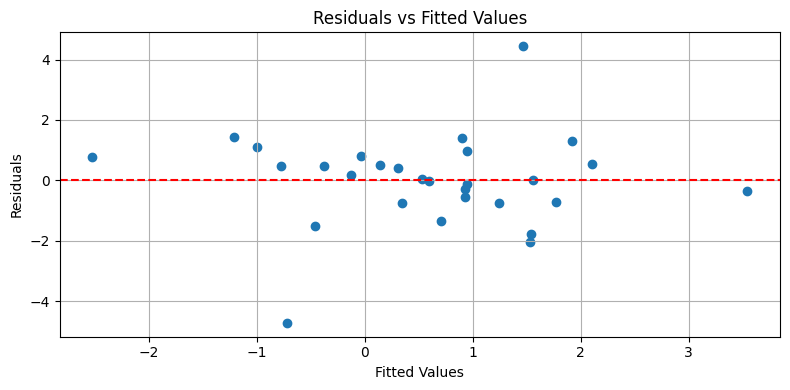

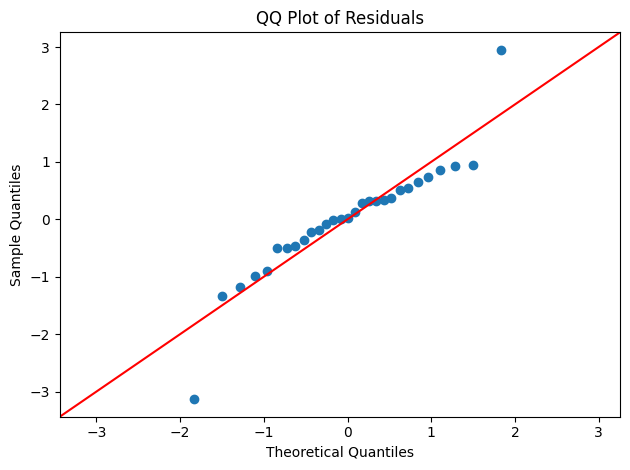

Ljung-Box Test for Autocorrelation (lag=1):
    lb_stat  lb_pvalue
1  1.789977   0.180929


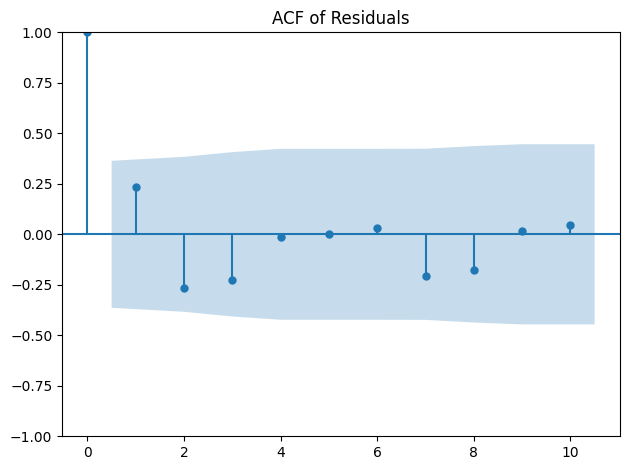

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import probplot

# residual
residuals = model.resid

# Residuals vs Fitted Values
plt.figure(figsize=(8, 4))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# QQ plot (check normality of residuals)
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()

# Ljung-Box test for autocorrelation (lag 1)
lb_test = acorr_ljungbox(residuals, lags=[1], return_df=True)
print("Ljung-Box Test for Autocorrelation (lag=1):")
print(lb_test)

# Autocorrelation Function (ACF) plot of residuals
sm.graphics.tsa.plot_acf(residuals, lags=10)
plt.title("ACF of Residuals")
plt.tight_layout()
plt.show()


### Regression Diagnostics Summary

- **Residuals vs Fitted Values**: The plot shows no clear patterns or funnel shapes, suggesting that the residuals have constant variance and that the model is correctly specified.

- **QQ Plot of Residuals**: Most residuals lie along the 45-degree line, indicating approximate normality. Some deviations at the tails suggest mild non-normality, which is addressed by using robust standard errors (HC3).

- **ACF Plot**: The autocorrelation function shows no significant autocorrelation in residuals up to 10 lags. This confirms the independence assumption holds.

Overall, diagnostic plots support the validity of the linear regression model with robust standard errors.


Part 2: Regression with Lagged Dependent Variable (AR(1) Model)

In [ ]:
# Add one-period lag of the dependent variable
logdiff_data["logdiff_household_consumption_lag1"] = logdiff_data["logdiff_household_consumption"].shift(1)

# Drop missing value due to lag
ar_data = logdiff_data.dropna().copy()

# Define y and X including AR(1) term
y_ar = ar_data["logdiff_household_consumption"]
X_ar = ar_data[[
    "logdiff_stock_asset",
    "logdiff_fixed_asset",
    "logdiff_employment_income",
    "logdiff_household_consumption_lag1"  # AR(1) term
]]
X_ar = sm.add_constant(X_ar)

# Fit OLS model with robust standard errors
ar_model = sm.OLS(y_ar, X_ar).fit(cov_type='HC3')

# Show summary
print("OLS with AR(1) Term:")
print(ar_model.summary())


OLS with AR(1) Term:
                                  OLS Regression Results                                 
Dep. Variable:     logdiff_household_consumption   R-squared:                       0.426
Model:                                       OLS   Adj. R-squared:                  0.326
Method:                            Least Squares   F-statistic:                     3.129
Date:                           Mon, 12 May 2025   Prob (F-statistic):             0.0342
Time:                                   18:16:38   Log-Likelihood:                -50.445
No. Observations:                             28   AIC:                             110.9
Df Residuals:                                 23   BIC:                             117.6
Df Model:                                      4                                         
Covariance Type:                             HC3                                         
                                         coef    std err          z      P>|z| 

#### 6.2.2.2 GLS (Generalized Least Squares)

In [ ]:
import statsmodels.api as sm

# Define variables
y_gls = logdiff_data["logdiff_household_consumption"]
X_gls = logdiff_data[[
    "logdiff_stock_asset",
    "logdiff_fixed_asset",
    "logdiff_employment_income"
]]
X_gls = sm.add_constant(X_gls)

# Fit GLS model
gls_model = sm.GLS(y_gls, X_gls).fit()

# Summary
print("GLS Regression Results:")
print(gls_model.summary())


GLS Regression Results:
                                  GLS Regression Results                                 
Dep. Variable:     logdiff_household_consumption   R-squared:                       0.384
Model:                                       GLS   Adj. R-squared:                  0.310
Method:                            Least Squares   F-statistic:                     5.195
Date:                           Mon, 12 May 2025   Prob (F-statistic):            0.00630
Time:                                   18:04:41   Log-Likelihood:                -53.005
No. Observations:                             29   AIC:                             114.0
Df Residuals:                                 25   BIC:                             119.5
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                                coef    std err          t      P>|t|      [

#### 6.2.2.3 GLM (Generalized Linear Model)

In [ ]:
import statsmodels.api as sm

# Define variables
y_gls = logdiff_data["logdiff_household_consumption"]
X_gls = logdiff_data[[
    "logdiff_stock_asset",
    "logdiff_fixed_asset",
    "logdiff_employment_income"
]]

glm_model = sm.GLM(
    y_gls, X_gls, 
    family=sm.families.Gaussian()
).fit()

# Summary
print("GLM Regression Results:")
print(glm_model.summary())

GLM Regression Results:
                       Generalized Linear Model Regression Results                       
Dep. Variable:     logdiff_household_consumption   No. Observations:                   29
Model:                                       GLM   Df Residuals:                       26
Model Family:                           Gaussian   Df Model:                            2
Link Function:                          Identity   Scale:                          2.6160
Method:                                     IRLS   Log-Likelihood:                -53.510
Date:                           Mon, 12 May 2025   Deviance:                       68.015
Time:                                   18:05:48   Pearson chi2:                     68.0
No. Iterations:                                3   Pseudo R-squ. (CS):             0.4024
Covariance Type:                       nonrobust                                         
                                coef    std err          z      P>|z|      [

Summary (Based on Robost OLS)

- The growth rate of **housing assets** (fixed_asset) has a statistically **significant** positive effect on the growth rate of consumption
  - Changes in consumption tend to be linked to housing-related assets in particular

- **Stock assets** and **employer compensation** are **not significant**
  - At least in the short-run (log-difference model), the effect may be limited
